Exact probability (7-10 heads): 0.5304


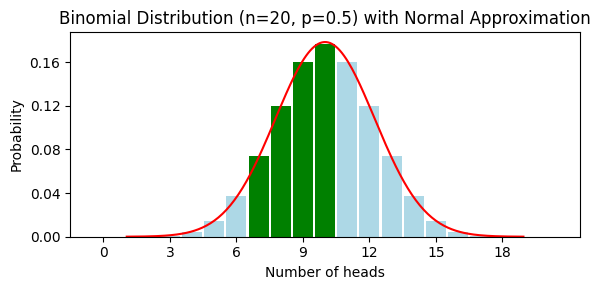

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

# Parameters for the binomial distribution
n, p = 20, 0.5

# Create a DataFrame for x values and their probabilities
df = pd.DataFrame({'x': np.arange(n+1)})
df['p(x)'] = df['x'].apply(lambda x: binom.pmf(x, n, p))

# Display probabilities with 4 decimal places
pd.options.display.float_format = "{:,.4f}".format

# Exact probability for x = 7, 8, 9, 10
prob_exact = df['p(x)'].iloc[7:11].sum()
print(f"Exact probability (7-10 heads): {prob_exact:0.4f}")
# Output: 0.5304

# Auxiliary function: normal approximation to the binomial
def superimposed_normal(n, p):
    mean = n * p
    sd = np.sqrt(n * p * (1 - p))
    nx = np.linspace(mean - 4*sd, mean + 4*sd, 200)
    return mean, sd, nx, norm.pdf(nx, mean, sd)

# Generate normal approximation
mean, sd, nx, ny = superimposed_normal(n, p)

# Colours for bars: green for 7-10, light blue otherwise
bar_colors = ['green' if x in range(7, 11) else 'lightblue' for x in range(n+1)]

# Plot binomial PMF with highlighted bars
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(df['x'], df['p(x)'], width=0.9, color=bar_colors)
ax.plot(nx, ny, color='red')  # superimpose normal curve

# Add labels and title
ax.set_xlabel("Number of heads")
ax.set_ylabel("Probability")
ax.set_title("Binomial Distribution (n=20, p=0.5) with Normal Approximation")

# Ticks
ax.set_xticks(np.arange(0, n+1, 3))
ax.set_yticks([x/100 for x in range(0, 20, 4)])

plt.tight_layout()
fig.savefig('img/coin_flip_20.png')
plt.show()
